# Project initialization

## Importing libraries

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

## Importing data

In [146]:
# coffee beans in a certain coffe store
df = pd.read_csv("data/coffeebeans.csv", parse_dates=["Harvest.Year"])

## Cleaning the dataset

In [147]:
# change column names '.' to '_'
df.columns = df.columns.str.replace('.', '_')

# change feet to meter (all altitudes are already converted to meter, the unit was not corrected)
df["unit_of_measurement"] = 'm'

# convert harvest year to dates (some dates are in weird format, these will be lost during conversion)
df["Harvest_Year"] = pd.to_datetime(df["Harvest_Year"], errors="coerce")

# use grading dates for missing harvest years as these are pretty close to the harvest year
df["Harvest_Year"].fillna(df["Grading_Date"], inplace=True)

# only keep Year from the timestamp
df["Harvest_Year"] = df["Harvest_Year"].dt.strftime("%Y")

# replace country names
countries = ["Tanzania, United Republic Of", "United States (Hawaii)", "United States (Puerto Rico)"]
countries_new = ["Tanzania", "Hawaii", "Puerto Rico"]

for c, cn in zip(countries, countries_new):
    df = df.replace(to_replace=c, value=cn)
    
# drop values with missing tcp rating
df = df[df["Total_Cup_Points"] > 0]


C:\Users\Marci\AppData\Local\Temp\ipykernel_21164\4045757111.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


## Number of coffee bean types per country

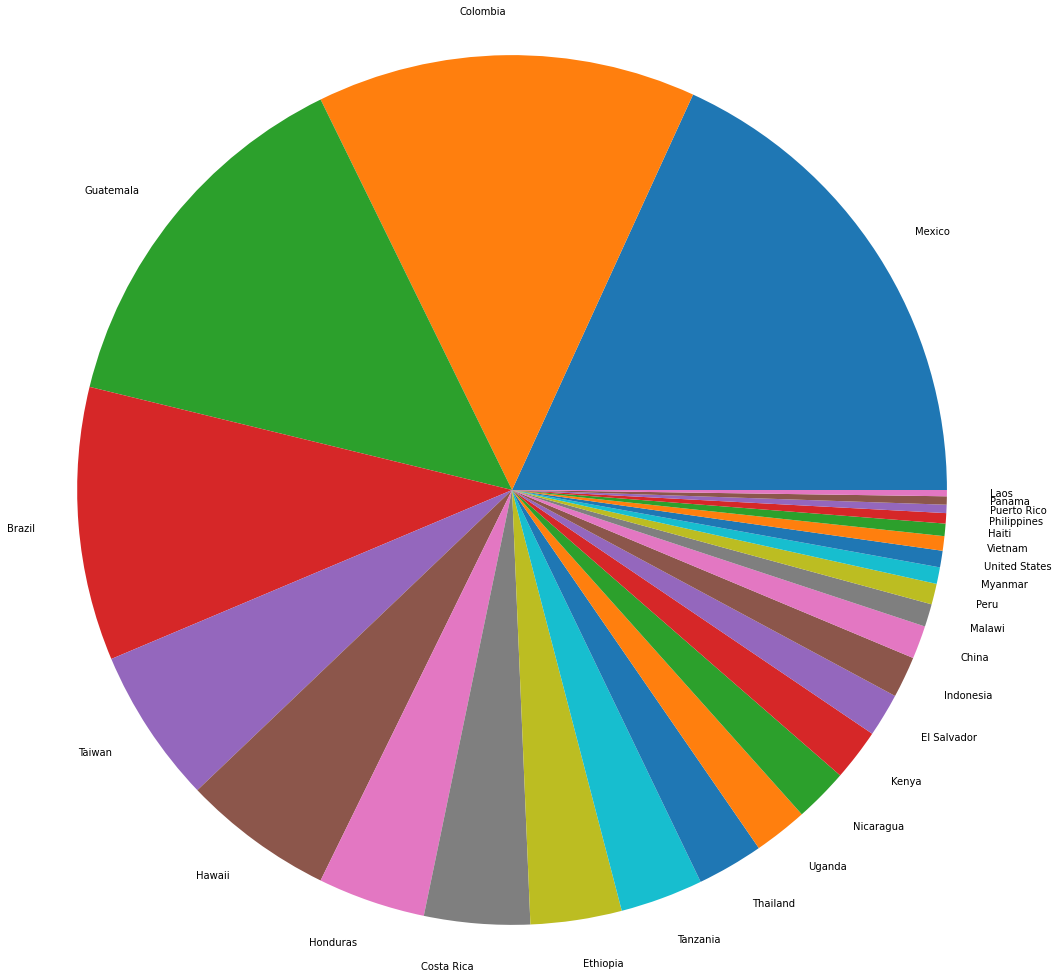

In [125]:
coffee_per_country = df.groupby(["Country_of_Origin"]).count()

# only show countries that have more than one coffee bean type
coffee_per_country = coffee_per_country[~(coffee_per_country["Species"] <= 2)]
coffee_per_country_sorted = coffee_per_country.sort_values(by="Species", ascending=False)

plt.figure(figsize=(10,10))
plt.pie(coffee_per_country_sorted["Species"], radius=2, labels=coffee_per_country_sorted.index)
plt.show()

## Average rating of coffee beans by year

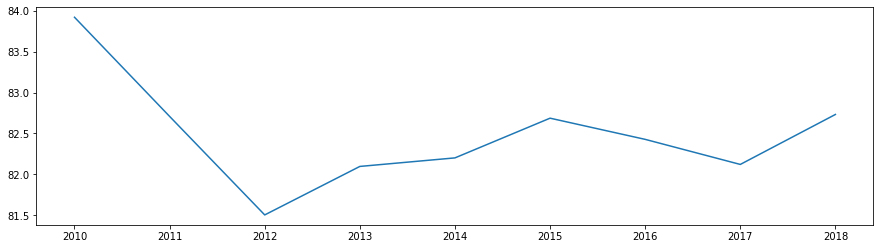

In [178]:
rating_per_year = df.groupby(["Harvest_Year"]).mean()

plt.figure(figsize=(15,4))
plt.plot(rating_per_year.index, rating_per_year["Total_Cup_Points"])
plt.show()

## Average rating of coffee beans by year on interpolated spline chart

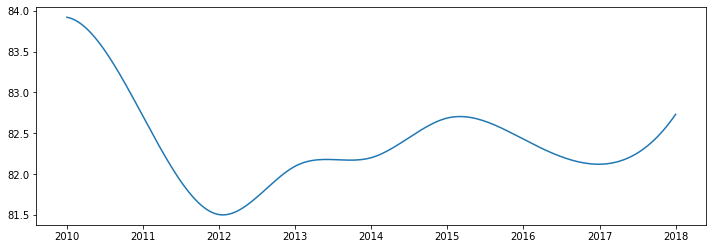

In [176]:
rating_per_year = df.groupby(["Harvest_Year"]).mean()

x = np.array(rating_per_year.index)
y = np.array(rating_per_year["Total_Cup_Points"])

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(float(x.min()), float(x.max()), 200) 

#define spline
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(xnew)

#create smooth line chart 
plt.figure(figsize=(12,4))
plt.plot(xnew, y_smooth)
plt.show()

## Average rating of coffee beans by year per country

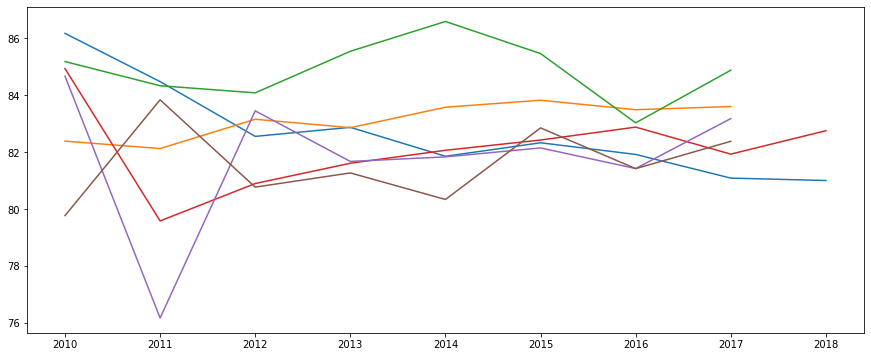

In [13]:
rating_per_year_country = df.groupby(["Harvest_Year", "Country_of_Origin"])["Total_Cup_Points"].mean().unstack()

# only create plot for countries with at least 8 ratings
rating_per_year_country = rating_per_year_country.loc[:,rating_per_year_country.notna().sum(0) >= 8]

plt.figure(figsize=(15,6))
plt.plot(rating_per_year_country.index, rating_per_year_country.values)

## Average rating of coffee beans by altitude

In [180]:
#for altitude
df.dropna(subset=["altitude_mean_meters"])

,Unnamed: 0,Species,Owner,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,...,Color,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,Arabica,cadexsa,Honduras,cerro bueno,NaN,cadexsa,13-63-174,cadexsa,1450 msnm,...,Green,4,"May 15th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.00,1450.00,1450.00
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1308,1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,...,Green,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
